<a href="https://colab.research.google.com/github/saigithubdcor/Stock-Forecasting-and-Data/blob/main/forecasting_automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price prediction using Facebook Prophet 

In [35]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [36]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [37]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [38]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'


## Importing the Dataset & Exploring it

In [39]:
df= pd.read_csv("AXISBANK.NS.csv")

In [40]:
#read_csv function from pandas

In [41]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-11-27,3.550000,3.550000,2.710000,3.400000,2.257744,21000.0
1,1998-11-30,3.250000,3.300000,3.100000,3.210000,2.131576,132000.0
2,1998-12-01,3.290000,3.460000,3.220000,3.390000,2.251104,123500.0
3,1998-12-02,3.360000,3.440000,3.320000,3.390000,2.251104,75500.0
4,1998-12-03,3.440000,3.490000,3.370000,3.390000,2.251104,102000.0
...,...,...,...,...,...,...,...
6070,2023-02-13,867.250000,870.450012,856.500000,859.099976,859.099976,5707194.0
6071,2023-02-14,862.549988,871.900024,854.250000,870.750000,870.750000,7527755.0
6072,2023-02-15,872.000000,872.200012,861.599976,868.299988,868.299988,7322266.0
6073,2023-02-16,872.799988,874.299988,862.250000,864.750000,864.750000,5843235.0


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6075 non-null   object 
 1   Open       6065 non-null   float64
 2   High       6065 non-null   float64
 3   Low        6065 non-null   float64
 4   Close      6065 non-null   float64
 5   Adj Close  6065 non-null   float64
 6   Volume     6065 non-null   float64
dtypes: float64(6), object(1)
memory usage: 332.4+ KB


In [43]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000,6.065000e+03
mean,280.995563,284.996151,276.546875,280.728152,273.534218,7.443163e+06
std,260.977006,263.914579,257.659145,260.791313,261.642843,8.790871e+06
min,2.470000,2.470000,2.460000,2.470000,1.640184,0.000000e+00
25%,31.200001,31.959999,30.400000,31.000000,26.620445,1.039755e+06
50%,215.399994,219.800003,210.199997,215.429993,200.589020,5.560430e+06
75%,506.000000,512.700012,500.250000,506.200012,500.687866,1.000594e+07
max,964.000000,970.000000,955.000000,962.299988,962.299988,1.205419e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [44]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [45]:
px.area(df, x="Date", y="Close")

In [46]:
px.line(df, x="Date", y="Close")

In [47]:
px.area(df, x="Date", y="Volume")


In [48]:
px.bar(df, x="Date", y="Volume")


In [49]:
px.box(df, y="Close")


# Understanding Facebook Prophet

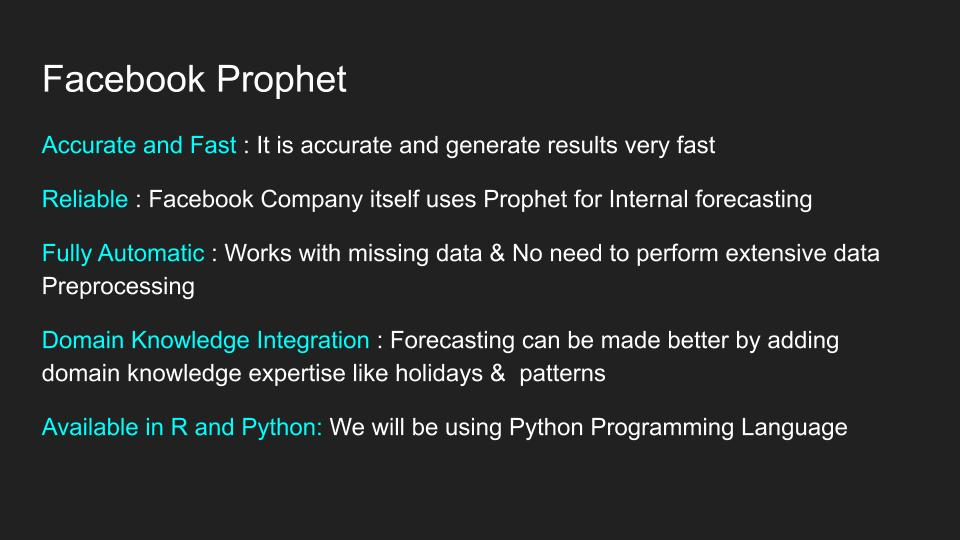

## Data Preperation

In [50]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-11-27,3.550000,3.550000,2.710000,3.400000,2.257744,21000.0
1,1998-11-30,3.250000,3.300000,3.100000,3.210000,2.131576,132000.0
2,1998-12-01,3.290000,3.460000,3.220000,3.390000,2.251104,123500.0
3,1998-12-02,3.360000,3.440000,3.320000,3.390000,2.251104,75500.0
4,1998-12-03,3.440000,3.490000,3.370000,3.390000,2.251104,102000.0
...,...,...,...,...,...,...,...
6070,2023-02-13,867.250000,870.450012,856.500000,859.099976,859.099976,5707194.0
6071,2023-02-14,862.549988,871.900024,854.250000,870.750000,870.750000,7527755.0
6072,2023-02-15,872.000000,872.200012,861.599976,868.299988,868.299988,7322266.0
6073,2023-02-16,872.799988,874.299988,862.250000,864.750000,864.750000,5843235.0


In [51]:
columns=['Date',"Close"]
ndf= pd.DataFrame(df, columns=columns)

In [52]:
ndf


,Date,Close
0,1998-11-27,3.400000
1,1998-11-30,3.210000
2,1998-12-01,3.390000
3,1998-12-02,3.390000
4,1998-12-03,3.390000
...,...,...
6070,2023-02-13,859.099976
6071,2023-02-14,870.750000
6072,2023-02-15,868.299988
6073,2023-02-16,864.750000


In [53]:
prophet_df= ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [54]:
prophet_df


,ds,y
0,1998-11-27,3.400000
1,1998-11-30,3.210000
2,1998-12-01,3.390000
3,1998-12-02,3.390000
4,1998-12-03,3.390000
...,...,...
6070,2023-02-13,859.099976
6071,2023-02-14,870.750000
6072,2023-02-15,868.299988
6073,2023-02-16,864.750000


## Creating Facebook Prophet Model

In [55]:
m=Prophet()
m.fit(prophet_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyr5m0hu5/u9_wp44i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyr5m0hu5/qx1zj12n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66695', 'data', 'file=/tmp/tmpyr5m0hu5/u9_wp44i.json', 'init=/tmp/tmpyr5m0hu5/qx1zj12n.json', 'output', 'file=/tmp/tmpyr5m0hu5/prophet_model1v8rrn1v/prophet_model-20230220094501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:45:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:45:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [56]:
future= m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [57]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1998-11-27,1.891353,-77.570091,80.833528,1.891353,1.891353,1.405792,1.405792,1.405792,-1.536738,-1.536738,-1.536738,2.942531,2.942531,2.942531,0.0,0.0,0.0,3.297145
1,1998-11-30,1.912106,-71.904833,77.205633,1.912106,1.912106,1.820413,1.820413,1.820413,-1.193167,-1.193167,-1.193167,3.013580,3.013580,3.013580,0.0,0.0,0.0,3.732519
2,1998-12-01,1.919023,-74.865627,80.845133,1.919023,1.919023,1.952219,1.952219,1.952219,-1.067310,-1.067310,-1.067310,3.019529,3.019529,3.019529,0.0,0.0,0.0,3.871242
3,1998-12-02,1.925941,-71.211363,75.221937,1.925941,1.925941,0.934705,0.934705,0.934705,-2.079038,-2.079038,-2.079038,3.013743,3.013743,3.013743,0.0,0.0,0.0,2.860646
4,1998-12-03,1.932859,-74.869048,78.060901,1.932859,1.932859,1.817409,1.817409,1.817409,-1.177759,-1.177759,-1.177759,2.995168,2.995168,2.995168,0.0,0.0,0.0,3.750268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6100,2023-03-15,787.285035,705.528155,858.263208,787.285035,787.285035,-4.674258,-4.674258,-4.674258,-2.079038,-2.079038,-2.079038,-2.595220,-2.595220,-2.595220,0.0,0.0,0.0,782.610778
6101,2023-03-16,787.412181,705.319098,857.861014,787.412181,787.412181,-4.516477,-4.516477,-4.516477,-1.177759,-1.177759,-1.177759,-3.338718,-3.338718,-3.338718,0.0,0.0,0.0,782.895704
6102,2023-03-17,787.539327,705.756334,851.623695,787.539327,787.539327,-5.596723,-5.596723,-5.596723,-1.536738,-1.536738,-1.536738,-4.059985,-4.059985,-4.059985,0.0,0.0,0.0,781.942604
6103,2023-03-18,787.666473,635.934154,791.359085,787.666473,787.666473,-74.385246,-74.385246,-74.385246,-69.632778,-69.632778,-69.632778,-4.752468,-4.752468,-4.752468,0.0,0.0,0.0,713.281227


In [58]:
px.line(forecast, x='ds', y='yhat')

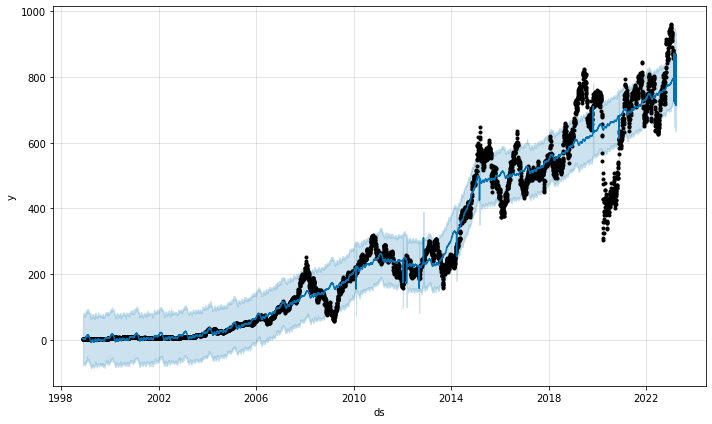

In [59]:
figure= m.plot(forecast,xlabel='ds',ylabel="y")

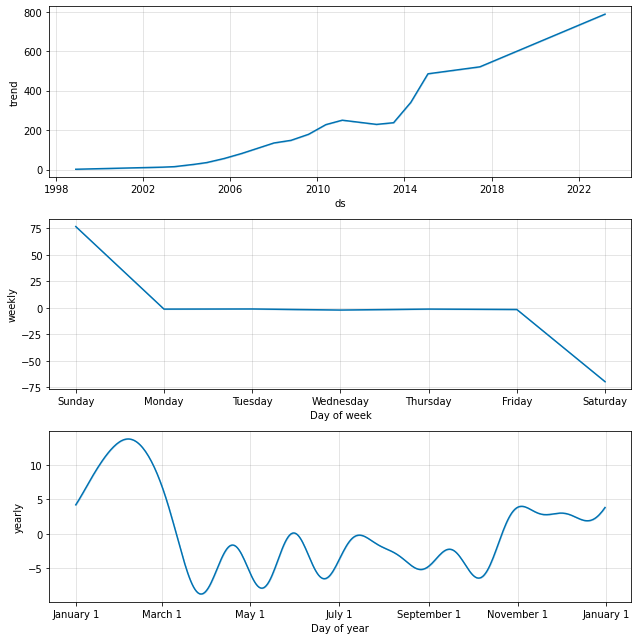

In [60]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [61]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>